In [1]:
import json
import requests
import time
from datetime import datetime

import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# Need to add parent directory to notebook path so we can import utils
import sys
sys.path.append("..")
from utils import BLOCKCHAINS, BlockchainAccessor

accessor = BlockchainAccessor('osmosis')
plt.rcParams['figure.figsize'] = [10, 5]

accessor._connect_to_db()
accessor.cursor = accessor.conn.cursor()

In [ ]:
accessor.cursor.execute("""
    SELECT
        e.start_time,
        SUM(n_sfs_delegations) AS total_delegated
    FROM
        mv_sfs_pool_agg mv
    INNER JOIN
        epochs e ON
        e.epoch = mv.epoch
    GROUP BY
        e.start_time;
""")

sfs_pool_agg = accessor.cursor.fetchall()

In [ ]:
sfs_pool_agg_df = pd.DataFrame(sfs_pool_agg, columns = ['date', 'n_sfs_delegations'])

In [ ]:
sns.scatterplot(data=sfs_pool_agg_df, x='date', y='n_sfs_delegations').set(
    title="SFS Delegations Over Time",
    xlabel="Epoch Date",
    ylabel="# of SFS Delegations"
)

plt.show()

In [ ]:
accessor.cursor = accessor.conn.cursor()
accessor.cursor.execute("""
    SELECT
        e.start_time,
        POW(10,-6)* SUM(amount) AS n_atoms
    FROM 
        hist_pool_assets hpa
    INNER JOIN
        epochs e 
        ON hpa.epoch = e.epoch 
    WHERE
        denom = 'ibc/27394FB092D2ECCD56123C74F36E4C1F926001CEADA9CA97EA622B25F41E5EB2'
    GROUP BY
        e.start_time
    ORDER BY
        e.start_time DESC;
""")

In [ ]:
atom_count = accessor.cursor.fetchall()
atom_count = pd.DataFrame(atom_count, columns=['start_time', 'n_atoms'])
atom_count

In [ ]:
sns.scatterplot(data=atom_count, x='start_time', y='n_atoms').set(
    title="Atoms in Osmosis",
    xlabel="Epoch Date",
    ylabel="# of Atoms in Pools"
)

plt.show()

In [4]:
accessor.cursor.execute("""
    SELECT
        e.start_time,
        td.token,
        IF(td.token in ('Sifchain Rowan', 'LikeCoin'), POW(10,-9) * SUM(amount), POW(10,-6)* SUM(amount)) AS n_token
    FROM 
        hist_pool_assets hpa
    INNER JOIN
        epochs e 
        ON hpa.epoch = e.epoch
    INNER JOIN
        token_denoms td ON
        td.denom = hpa.denom
    Where
        td.token IN ('Osmosis', 'Cosmos', 'TerraUSD', 'Juno', 'Luna')
    GROUP BY
        e.start_time,
        td.token
    ORDER BY
        e.start_time DESC,
        n_token DESC,        
        hpa.denom;
""")
token_count = accessor.cursor.fetchall()

ProgrammingError: execute() first

In [5]:
token_count = pd.DataFrame(token_count, columns=['start_time', 'denom', 'n_token'])
token_count

start_time     denom       n_token
0    2022-04-10 17:16:10  TerraUSD  2.448283e+08
1    2022-04-10 17:16:10   Osmosis  8.512787e+07
2    2022-04-10 17:16:10    Cosmos  1.106086e+07
3    2022-04-10 17:16:10      Juno  2.527305e+06
4    2022-04-10 17:16:10      Luna  1.575658e+06
...                  ...       ...           ...
1122 2021-06-21 17:00:32    Cosmos  2.822448e+05
1123 2021-06-20 17:00:20   Osmosis  9.460126e+05
1124 2021-06-20 17:00:20    Cosmos  1.942209e+05
1125 2021-06-19 17:00:10   Osmosis  1.749368e+05
1126 2021-06-19 17:00:10    Cosmos  3.337420e+04

[1127 rows x 3 columns]

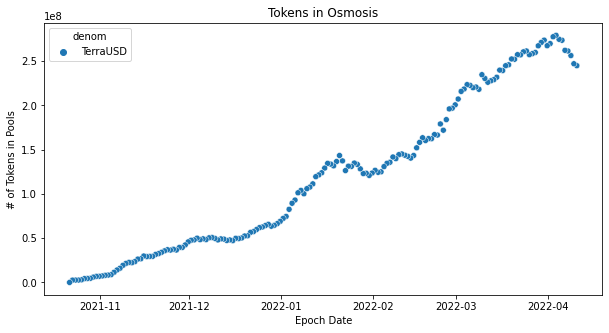

In [16]:
sns.scatterplot(data=token_count.loc[token_count.denom == 'TerraUSD'], x='start_time', y='n_token', hue='denom').set(
    title="Tokens in Osmosis",
    xlabel="Epoch Date",
    ylabel="# of Tokens in Pools"
)

plt.show()